# Module 2: Synthetic Data Generation

In [1]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

## Stage 1 – Loading Data and Baseline Generation

### Load real dataset

In [3]:
!pip install sdv

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 18.2 MB/s  0:00:00

   ---------------------------------------- 0/8 [graphviz]
   ---------------------------------------- 0/8 [graphviz]
   ---------------------------------------- 0/8 [graphviz]
   ---------------------------------------- 0/8 [graphviz]
   ---------------------------------------- 0/8 [graphviz]
   ---------------------------------------- 0/8 [graphviz]
   ---------------------------------------- 0/8 [graphviz]
   ----- ---------------------------------- 1/8 [Faker]
   ----- ---------------------------------- 1/8 [Faker]
   ----- ---------------------------------- 1/8 [Faker]
   ----- ---------------------------------- 1/8 [Faker]
   ----- ---------------------------------- 1/8 [Faker]
   ----- ---------------------------------- 1/8 [Faker]
   ----- ---------------------------------- 1/8 [Faker]
   ----- ---------------------------------- 1/8 [Fa

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans # help to check whether synthetic and real data are similar or not
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

from sdv.metadata import Metadata
from sdv.single_table import (
    GaussianCopulaSynthesizer,
    CTGANSynthesizer,
    CopulaGANSynthesizer,
    TVAESynthesizer
)
from sdv.evaluation.single_table import run_diagnostic, evaluate_quality, get_column_plot

# Load real dataset
df_credit_real = pd.read_csv('german_credit.csv')
df_metadata = Metadata.detect_from_dataframe(df_credit_real)
df_metadata



{
    "tables": {
        "table": {
            "columns": {
                "checking_status": {
                    "sdtype": "categorical"
                },
                "duration_months": {
                    "sdtype": "numerical"
                },
                "credit_history": {
                    "sdtype": "categorical"
                },
                "purpose": {
                    "sdtype": "categorical"
                },
                "credit_amount": {
                    "sdtype": "numerical"
                },
                "savings_status": {
                    "sdtype": "categorical"
                },
                "employment": {
                    "sdtype": "categorical"
                },
                "installment_rate": {
                    "sdtype": "categorical"
                },
                "personal_status_sex": {
                    "sdtype": "categorical"
                },
                "guarantors": {
                    "s

In [10]:
df_credit_real.head()

,checking_status,duration_months,credit_history,purpose,credit_amount,savings_status,employment,installment_rate,personal_status_sex,guarantors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


### Gaussian Copula Synthesizer using all data

In [ ]:
guassian_copula = GaussianCopulaSynthesizer(df_metadata)
guassian_copula.fit(df_credit_real)

df_credit_synthetic= guassian_copula.sample(len(df_credit_real))
df_credit_synthetic.head()



,checking_status,duration_months,credit_history,purpose,credit_amount,savings_status,employment,installment_rate,personal_status_sex,guarantors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,target
0,A12,15,A33,A43,1503,A61,A72,4,A93,A101,...,A121,26,A143,A152,1,A173,1,A191,A201,1
1,A14,25,A33,A40,1563,A62,A72,3,A93,A101,...,A123,23,A143,A152,1,A173,1,A192,A201,1
2,A12,27,A32,A41,3882,A61,A73,4,A94,A101,...,A123,23,A143,A152,1,A172,1,A191,A201,2
3,A11,11,A32,A43,460,A61,A72,4,A92,A103,...,A121,25,A143,A152,1,A173,1,A192,A201,1
4,A14,37,A32,A49,7293,A65,A74,4,A92,A101,...,A124,45,A141,A152,1,A173,1,A192,A201,1


# run_diagnostic- this shud be 100 percent, as it make sure that the structure is intact

In [17]:
run_diagnostic(df_credit_real, df_credit_synthetic, df_metadata)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 21/21 [00:00<00:00, 4390.63it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 112.52it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [19]:
# evaluate quallity, it gives distribution that is similar to real data
# higher the value better the quality
# pair trends means how well the relationships between columns are preserved

evaluate_quality(df_credit_real, df_credit_synthetic, df_metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 21/21 [00:00<00:00, 1689.56it/s]|
Column Shapes Score: 97.49%

(2/2) Evaluating Column Pair Trends: |██████████| 210/210 [00:00<00:00, 499.08it/s]|
Column Pair Trends Score: 91.18%

Overall Score (Average): 94.33%



## CopulaGANSynthesizer

In [11]:
copula_gan = CopulaGANSynthesizer(df_metadata)
copula_gan.fit(df_credit_real)

df_credit_synthetic_gan= copula_gan.sample(len(df_credit_real))
df_credit_synthetic_gan.head()


,checking_status,duration_months,credit_history,purpose,credit_amount,savings_status,employment,installment_rate,personal_status_sex,guarantors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,target
0,A11,16,A33,A40,2655,A65,A72,1,A93,A103,...,A121,21,A143,A152,1,A173,1,A191,A201,1
1,A12,18,A32,A42,662,A61,A75,4,A93,A101,...,A121,55,A143,A152,1,A171,1,A191,A201,1
2,A11,20,A32,A40,3184,A65,A73,1,A93,A101,...,A121,24,A143,A152,1,A173,2,A192,A201,1
3,A13,27,A34,A41,3188,A61,A72,2,A93,A101,...,A123,35,A143,A152,1,A173,1,A192,A201,1
4,A11,24,A34,A41,811,A61,A72,2,A92,A101,...,A123,36,A141,A153,1,A173,1,A191,A201,1


In [20]:
run_diagnostic(df_credit_real, df_credit_synthetic_gan, df_metadata)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 21/21 [00:00<00:00, 1909.27it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 291.41it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [21]:
evaluate_quality(df_credit_real, df_credit_synthetic_gan, df_metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 21/21 [00:00<00:00, 2000.10it/s]|
Column Shapes Score: 90.21%

(2/2) Evaluating Column Pair Trends: |██████████| 210/210 [00:00<00:00, 449.25it/s]|
Column Pair Trends Score: 83.17%

Overall Score (Average): 86.69%



## Stage 2: Pattern Exploration

### PCA Visualization

In [24]:
# Part A – PCA Visualization
def visualize_pca(real_df, synth_df, label):
    # Select numeric columns
    numeric_cols = real_df.select_dtypes(include=np.number).columns
    synth_df = synth_df[numeric_cols]

    # Standardize data
    scaler = StandardScaler()
    X_real = scaler.fit_transform(real_df[numeric_cols])
    X_synth = scaler.transform(synth_df)

    # Apply PCA
    pca = PCA(n_components=2, random_state=42)
    pcs_real = pca.fit_transform(X_real)
    pcs_synth = pca.transform(X_synth)

    # Plot PCA results
    plt.figure(figsize=(7,5))
    plt.scatter(pcs_real[:,0], pcs_real[:,1], alpha=0.5, label="Real", s=20)
    plt.scatter(pcs_synth[:,0], pcs_synth[:,1], alpha=0.5, label="Synthetic", s=20)
    plt.title(f"PCA — Real vs {label}")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend()
    plt.show()

    return pcs_real, pcs_synth




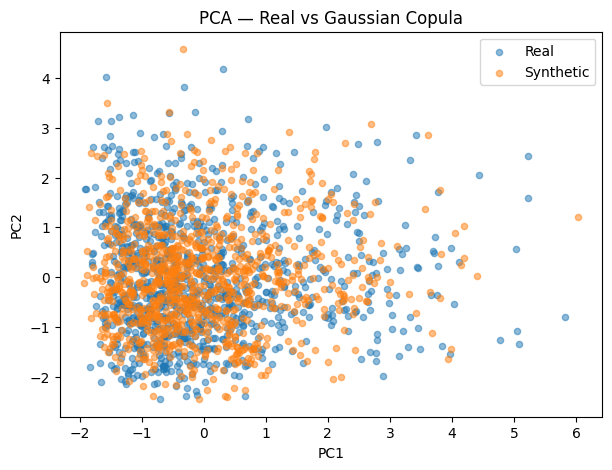

In [25]:

# Gaussian Copula

pcs_real_g, pcs_synth_g = visualize_pca(df_credit_real, df_credit_synthetic, "Gaussian Copula")



In [28]:
# changing array to dataframe
pcs_real_g = pd.DataFrame(pcs_real_g, columns=['PC1', 'PC2'])
pcs_synth_g = pd.DataFrame(pcs_synth_g, columns=['PC1', 'PC2'])

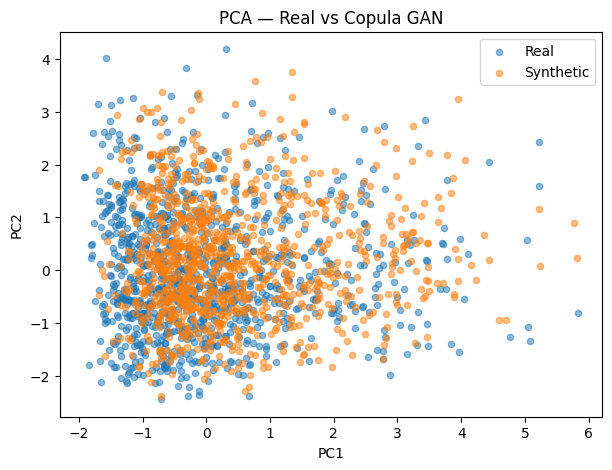

In [31]:
# copula GAN
pcs_real_cg, pcs_synth_cg =visualize_pca(df_credit_real, df_credit_synthetic_gan, "Copula GAN")
pcs_real_cg = pd.DataFrame(pcs_real_cg, columns=['PC1', 'PC2'])
pcs_synth_cg = pd.DataFrame(pcs_synth_cg, columns=['PC1', 'PC2'])

### KMeans and Silhouette Score

In [37]:
def Kmeans_s_score(real_df, synthetic_df):
    silhte_score = 0
    numeric_columns = real_df.select_dtypes(include = np.number).columns
    combined = pd.concat([real_df[numeric_columns], synthetic_df[numeric_columns]], ignore_index=True)
    combined_scaled = StandardScaler().fit_transform(combined)
    kmeans = KMeans(n_init =10, n_clusters =2, random_state = 42).fit(combined_scaled)
    silhte_score = silhouette_score(combined_scaled, kmeans.labels_)
    labels = kmeans.labels_
    return (silhte_score, labels)

In [38]:
ssor, labels = Kmeans_s_score(df_credit_real, df_credit_synthetic)
print("Silhouette Score for Gaussian Copula:", ssor)

Silhouette Score for Gaussian Copula: 0.1897549003622825


In [39]:
ssor, labels = Kmeans_s_score(df_credit_real, df_credit_synthetic_gan)
print("Silhouette Score for Gaussian Copula:", ssor)

Silhouette Score for Gaussian Copula: 0.18427483472624182


In [ ]:
kmean_guassian = KMeans(n_clusters=2, random_state=42)
kmean_gan = KMeans(n_clusters=2, random_state=42)


In [35]:

model_g = kmean_guassian.fit(pd.concat([pcs_real_g, pcs_real_g], ignore_index=True,))
model__g = silhouette_score(pd.concat([pcs_real_g, pcs_synth_g], ignore_index=True,), model_g.labels_)
print("Silhouette Score for Gaussian Copula PCA:", model__g)


Silhouette Score for Gaussian Copula PCA: 0.09247513894897064


In [36]:
model_c =kmean_gan.fit(pd.concat([pcs_real_cg, pcs_real_cg], ignore_index=True))
model_c_ = silhouette_score(pd.concat([pcs_real_cg, pcs_synth_cg], ignore_index=True,), model_c.labels_)
print("Silhouette Score for Copula GAN PCA:", model_c_)

Silhouette Score for Copula GAN PCA: 0.09009671054238073


### Mean Absolute Correlation Difference

In [41]:
def evaluate_mean_abs_corr(real_df, synthetic_df):
    mac = (real_df.corr(numeric_only=True) - synthetic_df.corr(numeric_only=True)).abs().mean().mean()
    return mac

In [42]:
mac_guassian = evaluate_mean_abs_corr(df_credit_real, df_credit_synthetic)
print("Mean Absolute Correlation for Gaussian Copula:", mac_guassian) 

Mean Absolute Correlation for Gaussian Copula: 0.04905735762715762


In [43]:
mac_copula_gan = evaluate_mean_abs_corr(df_credit_real, df_credit_synthetic_gan)
print("Mean Absolute Correlation for Copula GAN:", mac_copula_gan)

Mean Absolute Correlation for Copula GAN: 0.08422866685020908


## Stage 3: Diagnostic Evaluation

Use:
- `run_diagnostic()` → checks data validity & structure  
- `evaluate_quality()` → compares column shapes & relationships  
- `get_column_plot()` → visualizes one feature (e.g., `credit_amount`)

If `fig.show()` doesn’t display, save the plot as HTML:
```python
fig.write_html("credit_amount_comparison.html")

In [45]:
def diagnostic_checks(real_df, synthetic_df, metadata):
    # Basic statistics
    print("Basic Statistics:")
    print(run_diagnostic(real_df, synthetic_df, metadata))
    print("\n")
    # Evaluate quality
    print("Quality Evaluation:")
    print(evaluate_quality(real_df, synthetic_df, metadata))
    print("\n")
    # PCA Visualization
    visualize_pca(real_df, synthetic_df, "Synthetic Data")
    print("\n")
    # KMeans Silhouette Score
    ssor, _ = Kmeans_s_score(real_df, synthetic_df)
    print(f"KMeans Silhouette Score: {ssor}")
    # Mean Absolute Correlation
    mac = evaluate_mean_abs_corr(real_df, synthetic_df)
    print(f"Mean Absolute Correlation: {mac}")

    # Column-level visualization for one important variable, for example for credit_amount column
    fig = get_column_plot(
        real_data=real_df,
        synthetic_data= synthetic_df,
        column_name="credit_amount",
        metadata=   metadata
    )
    fig.write_html("credit_amount_comparison.html")
    print("Column-level visualization saved as 'credit_amount_comparison.html'" )



Basic Statistics:
Generating report ...

(1/2) Evaluating Data Validity: |██████████| 21/21 [00:00<00:00, 1656.42it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 247.22it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



Quality Evaluation:
Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 21/21 [00:00<00:00, 1783.04it/s]|
Column Shapes Score: 97.49%

(2/2) Evaluating Column Pair Trends: |██████████| 210/210 [00:00<00:00, 463.02it/s]|
Column Pair Trends Score: 91.18%

Overall Score (Average): 94.33%





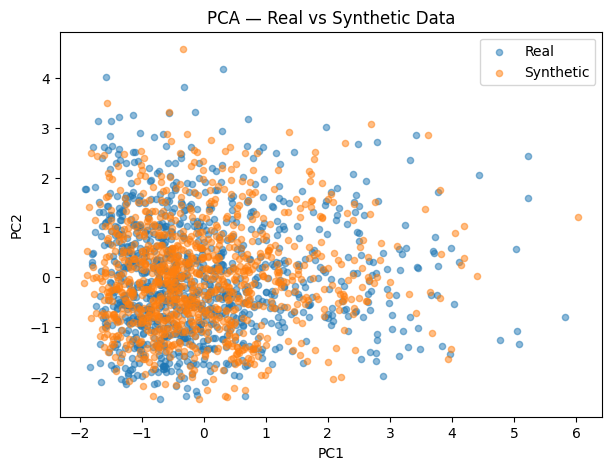



KMeans Silhouette Score: 0.1897549003622825
Mean Absolute Correlation: 0.04905735762715762
Column-level visualization saved as 'credit_amount_comparison.html'


In [46]:
diagnostic_checks(df_credit_real, df_credit_synthetic, df_metadata)

Basic Statistics:
Generating report ...

(1/2) Evaluating Data Validity: |██████████| 21/21 [00:00<00:00, 1125.11it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 249.94it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



Quality Evaluation:
Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 21/21 [00:00<00:00, 1388.56it/s]|
Column Shapes Score: 90.21%

(2/2) Evaluating Column Pair Trends: |██████████| 210/210 [00:00<00:00, 458.75it/s]|
Column Pair Trends Score: 83.17%

Overall Score (Average): 86.69%





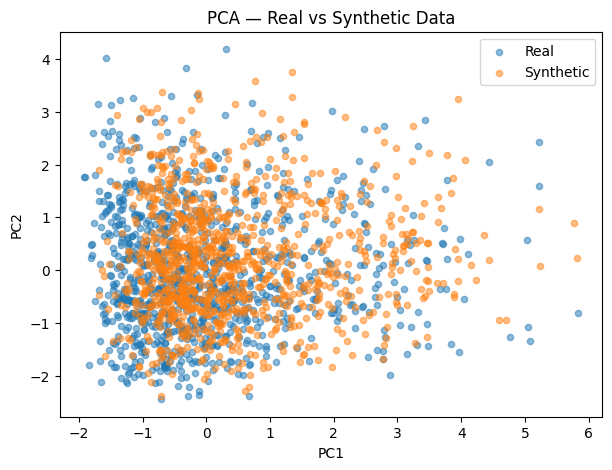



KMeans Silhouette Score: 0.18427483472624182
Mean Absolute Correlation: 0.08422866685020908
Column-level visualization saved as 'credit_amount_comparison.html'


In [47]:
diagnostic_checks(df_credit_real, df_credit_synthetic_gan, df_metadata)

In [44]:
# Diagnostic Report: checks overall data validity and structure


# Quality Report: evaluates column shapes and pairwise relationships


# Column-level visualization for one important variable, for example for credit_amount column
fig = get_column_plot(
    real_data=df_credit_real,
    synthetic_data= df_credit_synthetic,
    column_name="credit_amount",
    metadata=   df_metadata
)
fig.write_html("credit_amount_comparison.html")

## Stage 4: Parameter Variation

In [49]:
#Option 1 Undersampling Guassian Copula

df_synthetic_bad =  GaussianCopulaSynthesizer(df_metadata)
df_synthetic_bad.fit(df_credit_real.sample(frac=0.2, random_state=42))
df_credit_synthetic_bad= df_synthetic_bad.sample(len(df_credit_real))
run_diagnostic(df_credit_real, df_credit_synthetic_bad, df_metadata)


Generating report ...

(1/2) Evaluating Data Validity: |██████████| 21/21 [00:00<00:00, 1273.28it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<?, ?it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [50]:
evaluate_quality(df_credit_real, df_credit_synthetic_bad, df_metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 21/21 [00:00<00:00, 1360.52it/s]|
Column Shapes Score: 95.23%

(2/2) Evaluating Column Pair Trends: |██████████| 210/210 [00:00<00:00, 451.68it/s]|
Column Pair Trends Score: 88.55%

Overall Score (Average): 91.89%



In [ ]:
#Option 2

In [ ]:
#Option 3: Randomized Baseline
real_num = real.select_dtypes(include=np.number)
numeric_cols = real_num.columns
bad_synth = pd.DataFrame({
    col: np.random.permutation(real_num[col].values * np.random.uniform(0.5, 3.0))
    for col in numeric_cols
})
bad_synth_full = bad_synth.copy()
for col in real.columns:
    if col not in bad_synth_full.columns:
        bad_synth_full[col] = np.random.choice(real[col], size=len(real))